**Name: Prashant Singh**

**Enrollnment Number: SAU/CS/Mtech/(CS)/2024/04**

**Assignment-3**

**Questions**

**Question 1**:

Implement Linear Discriminant Analysis as a function. The function
should take data points as inputs and should return the data in the
reduced space.

**Question 2**:

In the Iris dataset, choose the first 2 features, i.e. sepal length and
sepal width.

a) Run your code on this Iris dataset and obtain the linear discriminant.

b) Plot the linear discriminant in the original space. Further, show the
transformed data.
c) Find the distance between the projected means of the two classes.


**Question 3**:

Generate a binary dataset (200 samples in each class ) with mean [2,2],
[6,-2] and covariance matrix being [1, 1.5; 1.5, 3] respectively.


a) Perform dimension reduction using PCA and obtain the transformed
data using only the first PC.


b) Perform Dimension reduction using LDA and obtain the transformed
data using the linear discriminant.


c) Compare the accuracy of classification on the original, PCA and
LDA-transformed datasets ( For this task you can use any inbuilt su-
pervised classifier ). Briefly explain your observations from empirical
analysis of the classification accuracies in the aforementioned cases.

# **Data Loading**

In [ ]:
!wget https://gist.githubusercontent.com/netj/8836201/raw/iris.csv

--2024-09-19 09:48:13--  https://gist.githubusercontent.com/netj/8836201/raw/iris.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3975 (3.9K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   3.88K  --.-KB/s    in 0s      

2024-09-19 09:48:13 (54.5 MB/s) - ‘iris.csv’ saved [3975/3975]



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('iris.csv')
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


**About Iris Flower Dataset:**


Iris Flower Dataset Contains 4 features i.e. Sepal Length, Sepal Width, Petal Length and Petal Width

It has one target variable Species which is Variety containing 3 classes of 50 data each.

In [ ]:
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df['variety'].value_counts()

,count
variety,
Setosa,50
Versicolor,50
Virginica,50


In [ ]:
data=np.genfromtxt('iris.csv',delimiter=',',skip_header=1)
dataF=data[:,:-1]
print(f"The Features are {dataF}")


The Features are [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 

**Label Encoding**

As Values Target Variable of Iris Dataset is String we need to encode it into numerical value so that numerical calculation can be performed.

So here we use sklearn library for the same purpose.


In [ ]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
dataL = class_le.fit_transform(df['variety'].values)
print("Labels after Encoding:")
print(dataL)

Labels after Encoding:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


**Data Standardization**
*   Function data_standard will take dataset and will return standardize data.
*   Standardization of data will be done by first centralizing the data and then dividing it by standard deviation of the data to standardize it, now all features are on similar scale.

In [ ]:
def data_standard(data):
  print(f"Part of Data before Standardization:{data[:10,:]}")
  print(f"Size of Data before standardization:{data.shape}")
  mean=np.mean(data)
  print(f"The Mean of Old Data:{mean:.2f}")

  standard_dev=np.std(data)
  print(f"The Standard Deviation of Old Data:{standard_dev:.2f}")

  standard_data  = (data - mean )/standard_dev

  print(f"Part of Data After Standardization:{standard_data[:10,:]}")
  print(f"Size of Data After standardization:{standard_data.shape}")
  new_mean=np.mean(standard_data)
  print(f"Mean of Data After Standardization:{new_mean:.2f}")

  new_std=np.std(standard_data)
  print(f"Standard Deviation of Data After Standardization:{new_std:.2f}")

  return standard_data
st_data=data_standard(dataF)

Part of Data before Standardization:[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
Size of Data before standardization:(150, 4)
The Mean of Old Data:3.46
The Standard Deviation of Old Data:1.97
Part of Data After Standardization:[[ 0.82858665  0.01798522 -1.04592915 -1.65388022]
 [ 0.72726147 -0.23532773 -1.04592915 -1.65388022]
 [ 0.62593629 -0.13400255 -1.09659174 -1.65388022]
 [ 0.5752737  -0.18466514 -0.99526657 -1.65388022]
 [ 0.77792406  0.06864781 -1.04592915 -1.65388022]
 [ 0.98057441  0.22063558 -0.89394139 -1.55255505]
 [ 0.5752737  -0.03267737 -1.04592915 -1.60321764]
 [ 0.77792406 -0.03267737 -0.99526657 -1.65388022]
 [ 0.47394852 -0.28599032 -1.04592915 -1.65388022]
 [ 0.72726147 -0.18466514 -0.99526657 -1.70454281]]
Size of Data After standardization:(150, 4)
Mean of Data After Standardization:0.00
Standard Deviation of Data After

**Question-1**

Implement Linear Discriminant Analysis as a function. The function
should take data points as inputs and should return the data in the
reduced space.

Solution:

**LDA Function**

The goal of LDA is to find the feature subspace that optimizes class separability. Hence, LDA is a supervised algorithm.

* This Function will take Features, Labels and Num_components to form as input and will Return Reduced Data Space and Linear Discriminants as output.
* First it will calculate class mean and overall means.
* Next It will calculate with within class scatter with the help of class mean and store it in matrix.
* Then It will calculate between class scatter with the help of overall mean and store it in matrix.
* Eigenvalues and Eigen Vectors will be calculated from the matrix which is Dot product of Within Class Matrix and Between Class Matrix.
* Eigen Vectors is then multiplied with original Data to get Reduced Data space.



In [ ]:
def LDA(X, y, num_components):


    n_samples, n_features = X.shape
    classes = np.unique(y)
    n_classes = len(classes)

    mean_vectors = []
    for c in classes:
        mean_vectors.append(np.mean(X[y == c], axis=0))
    print("Mean Vectors:",mean_vectors)

    mean_overall = np.mean(X, axis=0)
    print("Feature Wise Overall Mean of Data:",mean_overall)
    print("Shape of Overall Mean:",mean_overall.shape)

    WithinClass_Mat = np.zeros((n_features, n_features))
    for c, mean_vec in zip(classes, mean_vectors):
        class_scatter = np.cov(X[y == c].T)
        WithinClass_Mat += class_scatter
    print("Within Class Scatter Matrix:",WithinClass_Mat)
    print("Shape of Within Class Scatter Matrix:",WithinClass_Mat.shape)


    BetweenClass_Mat = np.zeros((n_features, n_features))
    for c, mean_vec in zip(classes, mean_vectors):
        n = X[y == c].shape[0]
        mean_vec, mean_overall = mean_vec.reshape(n_features, 1), mean_overall.reshape(n_features, 1)
        BetweenClass_Mat += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

    print("Between Class Scatter Matrix:",BetweenClass_Mat)
    print("Shape of Between Class Scatter Matrix:",BetweenClass_Mat.shape)

    eigvals, eigvecs = np.linalg.eig(np.linalg.inv(WithinClass_Mat).dot(BetweenClass_Mat))

    print("Eigenvalues:",eigvals)
    print("Eigenvectors Corresponding to Eigenvalues:",eigvecs)

    Index = np.argsort(eigvals)[::-1]
    eigvecs, eigvals = eigvecs[:, Index],eigvals[Index]
    print("Eigenvalues in Decreasing Order:",eigvals)
    print("Eigenvectors Corresponding to decreasing Eigenvalues:",eigvecs)

    W = eigvecs[:, :num_components]

    LDA_space =X.dot(W)


    return LDA_space,W
Reduced_data,LDA_Components=LDA(st_data,dataL,2)
print("Part of New Feature Space:",Reduced_data[:10])
print("Shape of New Feature Space:",Reduced_data.shape)

Mean Vectors: [array([ 0.78096381, -0.01849185, -1.01451835, -1.63057543]), array([ 1.25212589, -0.35185168,  0.4030209 , -1.08341947]), array([ 1.58244597, -0.2485    ,  1.05758155, -0.72878135])]
Feature Wise Overall Mean of Data: [ 1.20517856 -0.20628118  0.1486947  -1.14759208]
Shape of Overall Mean: (4,)
Within Class Scatter Matrix: [[0.20405877 0.07139611 0.12898757 0.02956941]
 [0.07139611 0.08884965 0.04253804 0.02518716]
 [0.12898757 0.04253804 0.14259631 0.03285269]
 [0.02956941 0.02518716 0.03285269 0.03224925]]
Shape of Within Class Scatter Matrix: (4, 4)
Between Class Scatter Matrix: [[ 16.22464528  -5.12124685  42.41427288  18.29525184]
 [ -5.12124685   2.91190171 -14.69167637  -5.88612284]
 [ 42.41427288 -14.69167637 112.19108587  47.93924421]
 [ 18.29525184  -5.88612284  47.93924421  20.63967375]]
Shape of Between Class Scatter Matrix: (4, 4)
Eigenvalues: [ 1.57740453e+03  1.39841611e+01 -2.99131078e-14  7.44914463e-14]
Eigenvectors Corresponding to Eigenvalues: [[-0.20

In [ ]:
Rdata=pd.DataFrame(Reduced_data)
Rdata['class']=dataL
Rdata.columns=["LD1","LD2","class"]
print("The Reduced Data Space Information:")
print(Rdata.info())

The Reduced Data Space Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LD1     150 non-null    float64
 1   LD2     150 non-null    float64
 2   class   150 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 3.6 KB
None


In [ ]:
print(Rdata.head())

        LD1       LD2  class
0 -1.929236  0.992459      0
1 -1.810255  1.141717      0
2 -1.856304  1.070145      0
3 -1.770027  1.125786      0
4 -1.938227  0.963071      0


**Transformed Space Plot**

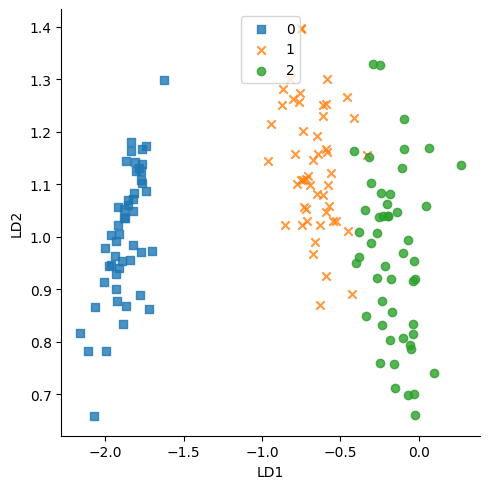

In [ ]:
markers = ['s', 'x','o']
sns.lmplot(x="LD1", y="LD2", data=Rdata, markers=markers,fit_reg=False, hue='class', legend=False)
plt.legend(loc='upper center')
plt.show()

**Question-2**
In the Iris dataset, choose the first 2 features, i.e. sepal length and
sepal width.

**Question-2(a)**

Run your code on this Iris dataset and obtain the linear discriminant.

In [ ]:
#Slicing last two features from Iris dataset
new_data=data[:,:-3]
print(f"Part of Iris Dataset with First 2 features:{new_data[:10,:]}")

Part of Iris Dataset with First 2 features:[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]]


In [ ]:
st1=data_standard(new_data)
DataSetReduced,LDA_Comp2=LDA(st1,dataL,2)
print("Part of New Feature Space:",DataSetReduced[:10])
print("Shape of New Feature Space:",DataSetReduced.shape)

Part of Data before Standardization:[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]]
Size of Data before standardization:(150, 2)
The Mean of Old Data:4.45
The Standard Deviation of Old Data:1.54
Part of Data After Standardization:[[ 0.42152687 -0.61661011]
 [ 0.29175975 -0.94102792]
 [ 0.16199263 -0.8112608 ]
 [ 0.09710906 -0.87614436]
 [ 0.35664331 -0.55172655]
 [ 0.61617756 -0.35707587]
 [ 0.09710906 -0.68149368]
 [ 0.35664331 -0.68149368]
 [-0.03265806 -1.00591148]
 [ 0.29175975 -0.87614436]]
Size of Data After standardization:(150, 2)
Mean of Data After Standardization:-0.00
Standard Deviation of Data After Standardization:1.00
Mean Vectors: [array([ 0.36053632, -0.66332628]), array([ 0.96395345, -1.09026011]), array([ 1.38699427, -0.95789765])]
Feature Wise Overall Mean of Data: [ 0.90382801 -0.90382801]
Shape of Overall Mean: (2,)
Within Class Scatter Matrix: [[0.3346955  0.1171033 ]
 [0.1171033  0.14573046]]
Shape of

In [ ]:
DataSetReduced1=pd.DataFrame(DataSetReduced)
DataSetReduced1['class']=dataL
DataSetReduced1.columns=["LD1","LD2","classes"]
print("The Reduced Data Space Information:")
print(DataSetReduced1.info())

The Reduced Data Space Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LD1      150 non-null    float64
 1   LD2      150 non-null    float64
 2   classes  150 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 3.6 KB
None


**Question-2(b)**

Plot the linear discriminant in the original space. Further, show the
transformed data.

**Linear Discriminants on Original Space**

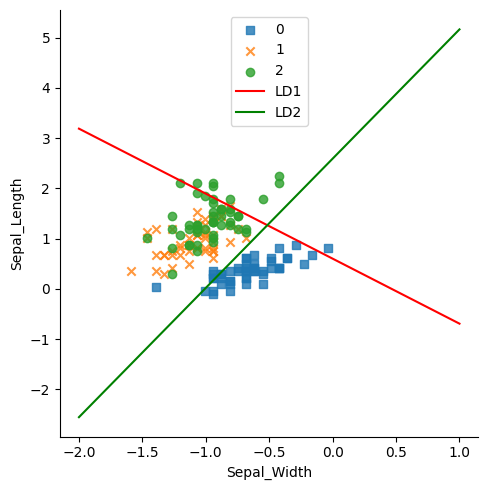

In [ ]:
df = pd.DataFrame(st1, columns=['Sepal_Length', 'Sepal_Width'])
df['classes'] = dataL
slope1 = LDA_Comp2[1,0]/LDA_Comp2[0,0]
intercept1 = DataSetReduced1['LD1'].mean() - slope1 * DataSetReduced1['LD2'].mean()
slope2 = LDA_Comp2[1,1]/LDA_Comp2[0,1]
intercept2 = DataSetReduced1['LD1'].mean() - slope2 * DataSetReduced1['LD2'].mean()

sns.lmplot(x="Sepal_Width", y="Sepal_Length", data=df, markers=markers, fit_reg=False, hue='classes', legend=False)
x = np.linspace(-2, 1, 100)
y = slope1 * x + intercept1
plt.plot(x, y, '-r', label='LD1')
x = np.linspace(-2, 1, 100)
y = slope2 * x + intercept2
plt.plot(x, y, '-g', label='LD2')

plt.legend(loc='upper center')
plt.show()

**Transformed Data**

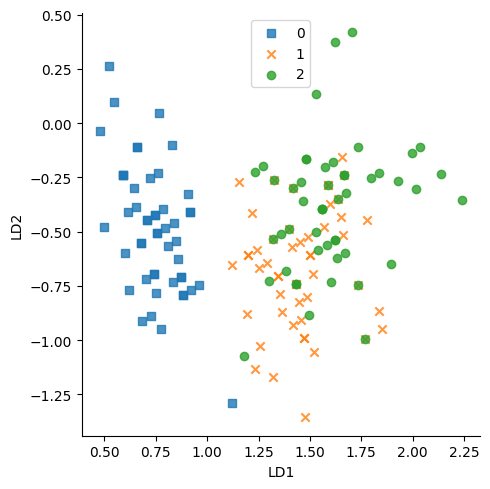

In [ ]:
markers = ['s', 'x','o']
sns.lmplot(x="LD1", y="LD2", data=DataSetReduced1, markers=markers,fit_reg=False, hue='classes', legend=False)
plt.legend(loc='upper center')
plt.show()

**Question 2(c)**

Find the distance between the projected means of the two classes.

In [ ]:
classes=np.unique(dataL)
mean_class_0 = DataSetReduced1[dataL == classes[0]].mean()
mean_class_1 = DataSetReduced1[dataL == classes[1]].mean()
distance = np.abs(mean_class_0 - mean_class_1)
print("The Distance Between Projected mean of the two Classes and both the Components:")
print(distance)


The Distance Between Projected mean of the two Classes and both the Components:
LD1        0.706891
LD2        0.179159
classes    1.000000
dtype: float64


**Question-3**

Generate a binary dataset (200 samples in each class ) with mean [2,2],
[6,-2] and covariance matrix being [1, 1.5; 1.5, 3] respectively.

In [ ]:
mean_class_0 = [2, 2]
mean_class_1 = [6, -2]
covariance_matrix = [[1, 1.5], [1.5, 3]]

class_0_samples = np.random.multivariate_normal(mean_class_0, covariance_matrix, 200)
class_1_samples = np.random.multivariate_normal(mean_class_1, covariance_matrix, 200)

Features = np.vstack((class_0_samples, class_1_samples))
Labels = np.array([0] * 200 + [1] * 200)
Generated_dataset = np.column_stack((Features, Labels))
print("The Randomly Generated Dataset is:")
print(Generated_dataset)
print("Shape of Generated Dataset:",Generated_dataset.shape)


The Randomly Generated Dataset is:
[[ 1.8699447   1.71274104  0.        ]
 [ 1.91754292  2.22388674  0.        ]
 [ 1.31815749  1.09420937  0.        ]
 ...
 [ 5.75671654 -2.67460943  1.        ]
 [ 5.30073956 -3.94980933  1.        ]
 [ 5.25041079 -4.08346484  1.        ]]
Shape of Generated Dataset: (400, 3)


**Question-3(a)**

Perform dimension reduction using PCA and obtain the transformed
data using only the first PC.

 **PCA Function**



*   Function PCA will take parameters i.e. Data and Num of Components(in this case 1) retain as input and will return reduced data.
*  Centered Meaned Data will be passed to np.cov which will find covariance  matrix of the data.

*   Eigen Values, Eigen Vectors will be passed to np.linalg.eigh which will return eigen values and vectors, which will be then reverse sorted.

*   Then the retain eigen vector will be projected on the data and that will be the reduced space.



In [ ]:
def PCA(data,num_components):
  data_meaned = data - np.mean(data, axis=0)
  print(f"Part of Data after Mean:{data_meaned[:10,:]}")
  print(f"Size of Data after Mean:{data_meaned.shape}")

  cov_matrix = np.cov(data_meaned, rowvar=False)

  print(f"Covariance Matrix of the standardize data:{cov_matrix}")
  print(f"Size of Covariance Matrix of the standardize data:{cov_matrix.shape}")

  eigen_val, eigen_vec=np.linalg.eigh(cov_matrix)
  print(f"Eigen Values of the Covariance Matrix:{eigen_val}")
  print(f"Corresponding Eigen Vectors of the Covariance Matrix:{eigen_vec}")

  index = np.argsort(eigen_val)[::-1]
  sorted_eigenval,sorted_eigenvec=eigen_val[index],eigen_vec[:,index]
  print(f"Eigen Values in Decreasing Order:{sorted_eigenval}")
  print(f"Eigen Vectors in corresponding to decreasing eigen values:{sorted_eigenvec}")
  print(f"Size of Eigen Vectors{sorted_eigenvec.shape}")

  principal_components=sorted_eigenvec[:num_components]
  print(f"Principal components retained are:{principal_components}")
  print(f"Size of Principal Components{principal_components.shape}")

  reduced_data=np.matmul(principal_components,data.T).T
  print(f"Size of Reduced Data:{reduced_data.shape}")

  return reduced_data

In [ ]:
PCADataReduced=PCA(Features,1)

Part of Data after Mean:[[-2.41874073  1.13834755]
 [-1.44740116  3.58384258]
 [-3.1936938   0.00997996]
 [-1.65447968  3.706179  ]
 [-3.78761081 -1.66396264]
 [-4.49089666 -1.36765418]
 [-2.74022968  1.62661248]
 [-1.61917639  1.79885511]
 [-3.35936048 -1.33234165]
 [-1.46790019  2.83081099]]
Size of Data after Mean:(400, 2)
Covariance Matrix of the standardize data:[[ 4.91313841 -2.47321412]
 [-2.47321412  6.65299412]]
Size of Covariance Matrix of the standardize data:(2, 2)
Eigen Values of the Covariance Matrix:[3.16131827 8.40481426]
Corresponding Eigen Vectors of the Covariance Matrix:[[-0.81603068 -0.57800858]
 [-0.57800858  0.81603068]]
Eigen Values in Decreasing Order:[8.40481426 3.16131827]
Eigen Vectors in corresponding to decreasing eigen values:[[-0.57800858 -0.81603068]
 [ 0.81603068 -0.57800858]]
Size of Eigen Vectors(2, 2)
Principal components retained are:[[-0.57800858 -0.81603068]]
Size of Principal Components(1, 2)
Size of Reduced Data:(400, 1)


**Question-3(b)**

Perform Dimension reduction using LDA and obtain the transformed
data using the linear discriminant.

In [ ]:
LDADataReduced,LDA_Co=LDA(stg,Labels,1)
print("Part of New Feature Space:",LDADataReduced[:10])
print("Shape of New Feature Space:",LDADataReduced.shape)

Mean Vectors: [array([-0.01100642, -0.02877034]), array([ 1.27832065, -1.2385439 ])]
Feature Wise Overall Mean of Data: [ 0.63365712 -0.63365712]
Shape of Overall Mean: (2,)
Within Class Scatter Matrix: [[0.21543022 0.32168908]
 [0.32168908 0.6197019 ]]
Shape of Within Class Scatter Matrix: (2, 2)
Between Class Scatter Matrix: [[ 166.2364297  -155.97938038]
 [-155.97938038  146.35520714]]
Shape of Between Class Scatter Matrix: (2, 2)
Eigenvalues: [7.82513942e+03 4.54747351e-13]
Eigenvectors Corresponding to Eigenvalues: [[ 0.86936604  0.68425095]
 [-0.49416869  0.72924662]]
Eigenvalues in Decreasing Order: [7.82513942e+03 4.54747351e-13]
Eigenvectors Corresponding to decreasing Eigenvalues: [[ 0.86936604  0.68425095]
 [-0.49416869  0.72924662]]
Part of New Feature Space: [[ 0.09459793]
 [ 0.15893967]
 [ 0.04163962]
 [ 0.09600026]
 [-0.09873411]
 [ 0.13467829]
 [ 0.18423596]
 [ 0.05360124]
 [ 0.0768642 ]
 [-0.05833076]]
Shape of New Feature Space: (400, 1)


**Question-3(c)**

Compare the accuracy of classification on the original, PCA and
LDA-transformed datasets ( For this task you can use any inbuilt su-
pervised classifier ). Briefly explain your observations from empirical
analysis of the classification accuracies in the aforementioned cases.


Solution:

**KNN Classifier** is used for the classification and measuring classification accuracy purpose. Sklearn Library is used for implementation of the same.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(Features, Labels, test_size=0.2, random_state=42)

Classification Accuracy of original data

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors
knn.fit(X_train, y_train)
y_pred_original = knn.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print(f"Accuracy of Original Data: {accuracy_original*100}%")

Accuracy of Original Data: 100.0%


Classification Accuracy of Reduced Data after applying PCA

In [ ]:
PCA_train=PCA(X_train,1)
PCA_test=PCA(X_test,1)


Part of Data after Mean:[[-1.73519716  3.69856121]
 [-2.01015254  2.01235765]
 [ 2.75191781 -0.81488062]
 [ 1.13601706 -2.76841228]
 [ 1.02633783 -1.22252349]
 [-1.50467069  1.39309415]
 [ 2.37744835 -2.07090946]
 [ 2.29085664 -1.64936239]
 [-1.40828907  3.45974286]
 [-2.09218706  2.43143566]]
Size of Data after Mean:(320, 2)
Covariance Matrix of the standardize data:[[ 5.11900529 -2.44463498]
 [-2.44463498  6.38164563]]
Size of Covariance Matrix of the standardize data:(2, 2)
Eigen Values of the Covariance Matrix:[3.22548777 8.27516314]
Corresponding Eigen Vectors of the Covariance Matrix:[[-0.79058329 -0.61235453]
 [-0.61235453  0.79058329]]
Eigen Values in Decreasing Order:[8.27516314 3.22548777]
Eigen Vectors in corresponding to decreasing eigen values:[[-0.61235453 -0.79058329]
 [ 0.79058329 -0.61235453]]
Size of Eigen Vectors(2, 2)
Principal components retained are:[[-0.61235453 -0.79058329]]
Size of Principal Components(1, 2)
Size of Reduced Data:(320, 1)
Part of Data after Mean

In [ ]:
knn.fit(PCA_train, y_train[:PCA_train.shape[0]])
y_pred_pca = knn.predict(PCA_test)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy of PCA Reduced Data: {accuracy_pca*100}%")

Accuracy of PCA Reduced Data: 55.00000000000001%


Classification Accuracy of Reduced Data After Applying LDA

In [ ]:
LDA_Train,ww=LDA(X_train,y_train,1)
LDA_test,xx=LDA(X_test,y_test,1)

Mean Vectors: [array([1.97407225, 1.96913248]), array([ 6.05589189, -1.78920441])]
Feature Wise Overall Mean of Data: [4.06600482 0.04298482]
Shape of Overall Mean: (2,)
Within Class Scatter Matrix: [[1.88785171 2.80224687]
 [2.80224687 5.68877078]]
Shape of Within Class Scatter Matrix: (2, 2)
Between Class Scatter Matrix: [[ 1332.06706565 -1226.50122554]
 [-1226.50122554  1129.30144062]]
Shape of Between Class Scatter Matrix: (2, 2)
Eigenvalues: [5.74432951e+03 2.27373675e-13]
Eigenvectors Corresponding to Eigenvalues: [[ 0.8765483   0.67735544]
 [-0.48131391  0.73565591]]
Eigenvalues in Decreasing Order: [5.74432951e+03 2.27373675e-13]
Eigenvectors Corresponding to decreasing Eigenvalues: [[ 0.8765483   0.67735544]
 [-0.48131391  0.73565591]]
Mean Vectors: [array([2.07419258, 2.01204777]), array([ 5.60358109, -2.44828975])]
Feature Wise Overall Mean of Data: [3.66241741 0.00489589]
Shape of Overall Mean: (2,)
Within Class Scatter Matrix: [[1.79936937 2.67170508]
 [2.67170508 5.816218

In [ ]:
knn.fit(LDA_Train, y_train[:LDA_Train.shape[0]])
y_pred_lda = knn.predict(LDA_test)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print("Accuracy of LDA Reduced Data:", accuracy_lda*100)

Accuracy of LDA Reduced Data: 100.0


**Observations**

As we can see Classification accuracy of Original data and reduced data space after applying LDA is 100% but for reduced data space after applying PCA is close to55%, this can be because while performing Dimenasionality Reduction using PCA, num of components to retain and scatter of data plays a significant role and on retaining less Prinicpal components there me be some loss of data.
So on lower dimension LDA is performing Perfect Classification but PCA depends on serval factors which is obvious as LDA uses mean as well as variance.